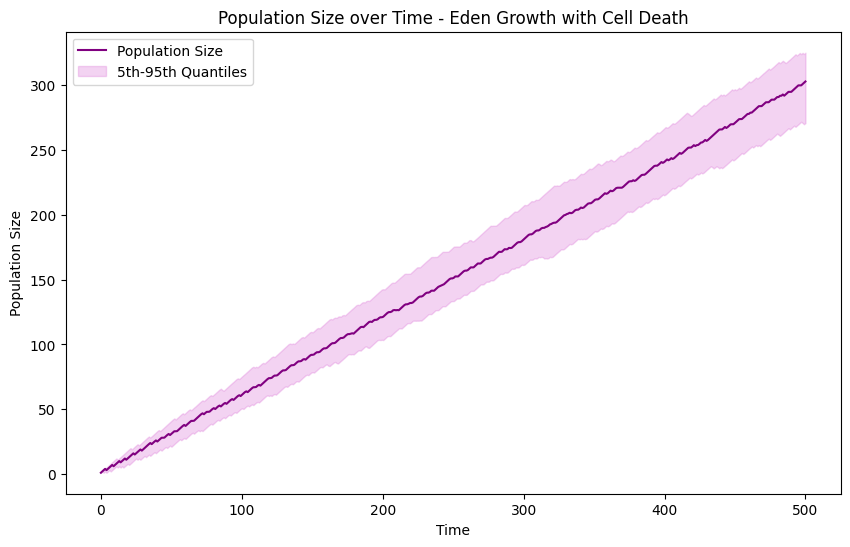

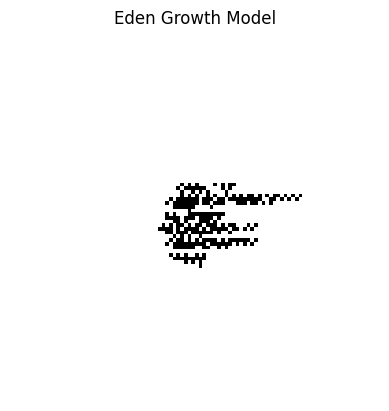

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_grid(size):
    grid = np.zeros((size, size), dtype=int)
    center = size // 2
    grid[center, center] = 1
    border = set()
    for nx, ny in get_moore_neighborhood(center, center, size):
        border.add((nx, ny))
    return grid, border

def get_moore_neighborhood(x, y, size):
    neighbors = [(x+i, y+j) for i in range(-1, 2) for j in range(-1, 2) if (i != 0 or j != 0)]
    valid_neighbors = [(nx, ny) for nx, ny in neighbors if 0 <= nx < size and 0 <= ny < size]
    return valid_neighbors

def grow_cluster(grid, border, iterations, base_growth_rate, base_death_prob):
    size = len(grid)
    population_size = [1]
    time_points = [0]

#time ! 

    for t in range(1, iterations + 1):
        growth_rate = #base_growth_rate + np.random.uniform(-0.05, 0.05)
        death_prob = #base_death_prob + np.random.uniform(-0.1, 0.1) 
        
        #normalised total birth & death rate 

        event_prob = np.random.rand()
        
        if event_prob < death_prob and np.sum(grid) > 1: #maybe not needed with new birth/death
            event = 'death'
        else:
            event = 'birth'

        if event == 'birth':
            if border:
                x, y = border.pop()
                grid[x, y] = 1
                population_size.append(population_size[-1] + 1)
                for nx, ny in get_moore_neighborhood(x, y, size):
                    if grid[nx, ny] == 0:
                        border.add((nx, ny))
        else:
            live_cells = list(zip(*np.where(grid == 1)))
            if live_cells:
                x, y = live_cells[np.random.randint(len(live_cells))]
                grid[x, y] = 0
                population_size.append(population_size[-1] - 1)
                for nx, ny in get_moore_neighborhood(x, y, size):
                    if grid[nx, ny] == 1:
                        border.add((nx, ny))

        time_points.append(t)

    return grid, population_size, time_points

def plot_grid(grid):
    plt.imshow(grid, cmap='Greys', interpolation='nearest')
    plt.title('Eden Growth Model')
    plt.axis('off')
    plt.show()

# Parameters
grid_size = 100
iterations = 500
base_growth_rate = 0.1
base_death_prob = 0.2  # Increased base cell death probability
num_simulations = 100

# Run multiple simulations
all_population_sizes = []
all_time_points = []

for _ in range(num_simulations):
    grid, population_size, time_points = grow_cluster(*initialize_grid(grid_size), iterations, base_growth_rate, base_death_prob)
    all_population_sizes.append(np.interp(np.linspace(0, max(time_points), iterations), time_points, population_size))
    all_time_points.append(np.linspace(0, max(time_points), iterations))

all_population_sizes = np.array(all_population_sizes)
time_points = np.mean(all_time_points, axis=0)

# Calculate quantiles
quantiles_1 = np.percentile(all_population_sizes, 5, axis=0)
quantiles_2 = np.percentile(all_population_sizes, 95, axis=0)
median_population_size = np.median(all_population_sizes, axis=0)

# Plot population size over time
plt.figure(figsize=(10, 6))
plt.plot(time_points, median_population_size, label='Population Size', color='purple')
plt.fill_between(time_points, quantiles_1, quantiles_2, color='orchid', alpha=0.3, label='5th-95th Quantiles')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Population Size over Time - Eden Growth with Cell Death')
plt.legend()
plt.show()

# Plot final grid 
plot_grid(grid)
